# RipVersion_Text_Generator (colab version)

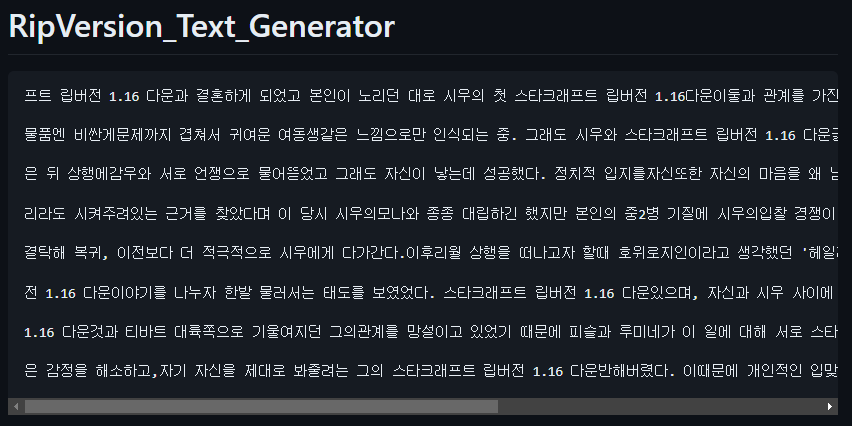

---


## 사용법


1. ```ORIGINAL_TEXT```와 ```TARGET_TEXT```를 채웁니다.
- ```ORIGINAL_TEXT``` : 섞을 글 원문
- ```TARGET_TEXT``` : 삽입할 키워드

2. 하단에 결과물이 출력됩니다.

In [14]:

# @title 빈칸을 채운 후 이 항목을 실행하세요.
import random as rd

class RIPVERSION_TEXT_GENERATOR :

    def __init__(self, original_text, target_text,  min_corpus_size=5, delete_rate=0.1, target_rate=0.1, per_line_size=100, total_line=8) -> None:

        self.min_corpus_size = min_corpus_size
        self.delete_rate = delete_rate
        self.target_rate = target_rate
        self.per_line_size = per_line_size
        self.total_line = total_line

        self.enough_size = 1

        self.original_text = original_text
        self.target_text = target_text
        self.final_text = ""

        self.errors = {
            "SHORT_ORIGINAL_TEXT" : "Original text length is not enough for generating output text.",
            "NOT_VALID_PARAMETERS" : "Parameters are not valid.",
            "ORIGINAL_EMPTY" : "ORIGINAL_TEXT is empty.",
            "TARGET_EMPTY" : "TARGET_TEXT is empty.",
        }

    def _fast_concat(self, target_list) :
        return "".join([ele.strip() for ele in target_list])

    def _load_data(self) :

        self.enough_size += self.delete_rate / (len(self.original_text) - self.delete_rate)
        if (len(self.original_text) <  self.per_line_size * self.total_line * self.enough_size ) :
            self._print_log(self.errors["SHORT_ORIGINAL_TEXT"])
            return 0

        self.original_text = self.original_text.split()

        return 1

    def __repr__(self) -> str:
        return "RIP VERSION TEXT GENERATOR OBJECT\n"

    def _print_log(self, log) :
        print(log)

    def _parse_line(self, corpus_size) -> str :

        true_corpus_size = rd.randint(corpus_size, corpus_size*2)
        entry_idx = rd.randint(0, len(self.original_text) - true_corpus_size)
        result = []

        for i in range(true_corpus_size) :
            result.append(self.original_text.pop(entry_idx))

        return result

    def _is_valid_params(self) :

        if (self.delete_rate < 0 or self.delete_rate > 0.5) :
            self._print_log(self.errors["NOT_VALID_PARAMETERS"])
            return 0

        if (self.target_rate < 0 or self.target_rate >= 1) :
            self._print_log(self.errors["NOT_VALID_PARAMETERS"])
            return 0

        if not self.original_text :
            self._print_log(self.errors["ORIGINAL_EMPTY"])
            return 0

        if not self.target_text :
            self._print_log(self.errors["TARGET_EMPTY"])
            return 0

        return 1

    def run(self) :

        if not self._is_valid_params() :
            return

        if not self._load_data() :
            return

        while (len(self.final_text) < self.per_line_size * self.total_line) :

            parsed_line = self._parse_line(self.min_corpus_size)

            if ( rd.random() < self.target_rate ) :
                parsed_line.append(self.target_text)

            if ( rd.random() < self.delete_rate ) :
                parsed_line.pop(rd.randint(0, len(parsed_line)-1))

            self.final_text += " ".join(parsed_line)

    def print_output(self) :

        startidx = endidx = 0

        for i in range(self.total_line) :
            endidx += self.per_line_size
            if (i+1 == self.total_line) :
                print(self.final_text[startidx:])
            else :
                print(self.final_text[startidx:endidx])
            startidx = endidx


ORIGINAL_TEXT = "\u201C\uC751. \uC790\uC804\uAC70\uB97C \uD0C0\uACE0 \uD559\uAD50\uB85C \uB3CC\uC544\uAC00\uB294 \uC911\uC5D0\u22EF\u22EF \uC815\uCCB4\uB97C \uC54C \uC218 \uC5C6\uB294 \uC801\uC5D0\uAC8C \uB0A9\uCE58\uB3FC\uBC84\uB838\uC5B4. \uC778\uC9C8\uC774 \uB418\uB294 \uAC74 \uC138\uB9AC\uCE74\uB098 \uB2F9\uD558\uB294 \uAC70\uB77C \uC0DD\uAC01\uD558\uACE0 \uBC29\uC2EC\uD574\uBC84\uB838\uB358 \uAC83 \uAC19\uC544. \uBBF8\uC548. \uBA74\uBAA9\uC774 \uC5C6\uC5B4.\u201D \uC2DC\uB85C\uCF54\uB97C \uB418\uB3CC\uB9AC\uAE30 \uC704\uD574 \uC0C9\uCC44\uAC00 \uAC15\uD0C8\uD55C \uC544\uD2B8\uB77C\uD558\uC2DC\uC2A4\uC758 \uBC29\uC8FC\uB97C \uACF5\uB7B5\uD558\uB358 \uB3C4\uC911, \uD638\uC2DC\uB178\uB294 \uC0C1\uB300\uD558\uACE0 \uC788\uC5C8\uB358 \uC2DC\uB85C\uCF54\uC758 \uB208\uBE5B\uC774 \uBB54\uAC00 \uB2E4\uB974\uB2E4\uB294 \uC810\uC744 \uB208\uCE58\uCC58\uACE0, 3\uAD6C\uC5ED\uC5D0 \uB2E4\uB2E4\uB974\uC790 \uC2DC\uB85C\uCF54\uC758 \uC2E0\uD638\uAC00 \uB450 \uAC1C\uAC00 \uBC1C\uACAC\uB418\uC5B4 \uBC18\uC804\uB418\uC9C0 \uC54A\uC740 \uC2DC\uB85C\uCF54\uAC00 \uC678\uBD80\uC640 \uCC28\uB2E8\uB41C \uD3D0\uC1C4 \uC139\uD130\uC5D0\uC11C \uBA40\uCA61\uD788 \uC0B4\uC544\uC788\uB294 \uAC83\uC774 \uD655\uC778\uB418\uC5C8\uB2E4. \uC989, \uCD5C\uC885\uD3B8\uC5D0\uC11C \uADF8\uB3D9\uC548 \uC120\uC0DD \uC55E\uC5D0 \uB098\uD0C0\uB09C \uC2DC\uB85C\uCF54\uB294 \uC774\uCABD \uC138\uACC4\uC758 \uC2DC\uB85C\uCF54\uAC00 \uC544\uB2C8\uB77C \uB2E4\uB978 \uC138\uACC4\uC5D0\uC11C \uCC3E\uC544\uC628 \uB610 \uB2E4\uB978 \uC2DC\uB85C\uCF54\uC600\uB358 \uAC83. \uC9C4\uC9DC \uC2DC\uB85C\uCF54\uB294 1\uC7A5\uC758 \uC0AC\uAC74\uC73C\uB85C \uC544\uD2B8\uB77C\uD558\uC2DC\uC2A4\uC5D0 \uB0A9\uCE58\uB2F9\uD55C \uC0C1\uD0DC\uC600\uC73C\uBA70 \uC704\uD574\uB97C \uAC00\uD558\uC9C0 \uC54A\uC558\uB2E4\uBA70 \uBAB8\uAC12\uC774 \uBAA9\uC801\uC778 \uB0A9\uCE58\uC77C \uAC83\uC774\uB77C \uCD94\uB860\uD588\uACE0 \uADF8 \uC640\uC911\uC5D0\uB3C4 \uAC00\uB9CC\uD788 \uC788\uC744 \uC218 \uC5C6\uB2E4\uBA74\uC11C \uBCF5\uBA74\uC744 \uB4A4\uC9D1\uC5B4\uC4F0\uACE0 \u2018\uAE30\uD68C\uB294 \uC900\uBE44\uB41C \uC790\uC5D0\uAC8C \uC624\uB294 \uBC95\u2019\uC774\uB77C\uBA70 \uBC29\uC8FC \uB0B4\uBD80\uC5D0\uC11C \uB3C8\uC774 \uB420 \uB9CC\uD55C \uBB3C\uAC74\uC744 \uD138\uC5B4\uBA39\uAE30 \uC704\uD574 \uB3CC\uC544\uB2E4\uB2C8\uB294 \uB4F1, \uC9C0\uAE08 \uD0A4\uBCF4\uD1A0\uC2A4\uAC00 \uBB34\uC2A8 \uC0C1\uD669\uC778\uC9C0 \uC804\uD600 \uBAA8\uB974\uB294 \uD0DC\uD3C9\uD55C \uBAA8\uC2B5\uC744 \uBCF4\uC778\uB2E4. \uC774\uD6C4 \uD640\uB85C\uADF8\uB7A8 \uD1B5\uC2E0\uC73C\uB85C \uC120\uC0DD \uC77C\uD589\uACFC \uC811\uC120\uD558\uAC8C \uB418\uB294\uB370 \uC2DC\uB85C\uCF54\uC758 \uB9D0\uC744 \uB4E3\uACE0 \uC77C\uD589\uC774 \uBAA8\uB450 \uBC99\uCA84 \uC788\uB294 \uC0C1\uD669\uC5D0\uC11C \uD638\uC2DC\uB178\uAC00 \uC2DC\uB85C\uCF54\uB294 \uC704\uAE30 \uC911\uC5D0 \uAE30\uD68C\uB97C \uC7A1\uC544\uB0B4\uB294 \uC544\uC774\uB77C\uBA70 \uCE6D\uCC2C\uD558\uBA74\uC11C\uB3C4 \uC790\uAE30\uAC00 \uC804\uC5D0 \uBB50\uB77C \uB9D0\uD588\uB0D0\uBA70 \uBB3B\uC790, \uB9C8\uC2A4\uD06C\uB97C \uBC97\uC73C\uBA70 \u2018\uC774\uB7F0 \uBC29\uC2DD\uC5D0 \uC775\uC219\uD574\uC9C0\uBA74 \uB098\uC911\uC5D0\uB294 \uC544\uBB34\uB807\uAC8C\uB098 \uAC19\uC740 \uC77C\uC744 \uBC8C\uC77C \uAC83\uC774\uB2E4. \uADF8\uB807\uAC8C \uC9C0\uCF1C\uB0B8 \uD559\uAD50\uAC00 \uBB34\uC2A8 \uC758\uBBF8\uAC00 \uC788\uACA0\uB0D0\u2019\uBA70 \uC808\uB3C4 \uD589\uC704\uB97C \uBA48\uCD98\uB2E4. \uC544\uB204\uBE44\uC2A4\uB97C \uBCF4\uACE0 \uCDA9\uACA9\uC744 \uBA39\uACE0 \uC788\uC5C8\uB358 \uB300\uCC45\uC704\uC6D0\uD68C \uC77C\uD589\uC740 \uC2DC\uB85C\uCF54\uAC00 \uD638\uC2DC\uB178\uC758 \uB9D0\uC744 \uB418\uC0C8\uAE30\uB294 \uAC78 \uBCF4\uACE0 \uC790\uC2E0\uB4E4\uC774 \uC544\uB294 \uC2DC\uB85C\uCF54\uB77C\uBA70 \uADF8\uC81C\uC11C\uC57C \uC548\uB3C4\uC758 \uD45C\uC815\uC744 \uC9D3\uB294\uB2E4. \uD638\uC2DC\uB178\uB294 \uC790\uC2E0\uB4E4\uC774 \uADF8\uCABD\uC73C\uB85C \uAC08 \uB54C\uAE4C\uC9C0 \uC58C\uC804\uD788 \uC788\uC73C\uB77C\uB294 \uC8FC\uC758\uB97C \uC8FC\uACE0 \uC2DC\uB85C\uCF54\uB294 \uC2E0\uB8B0\uB97C \uD45C\uD558\uBA70 \uC120\uC0DD\uC5D0\uAC8C \uAD6C\uCD9C\uB41C\uB2E4. 4\uAD6C\uC5ED\uC5D0\uC11C \uC120\uC0DD\uC774 \uC2DC\uB85C\uCF54\uC640 \uC870\uC6B0\uD588\uC744 \uB54C \uC6B0\uD2B8\uB098\uD53C\uC26C\uD300\uC740 \uAC1C\uC804 \uC9C1\uC804\uC5D0 \uC788\uC5C8\uB358 \uC0AC\uACE0\uB85C \uC778\uD574 \uD574\uD0B9\uC774 \uC9C4\uD589\uB41C \uC0C1\uD669\uC774\uC5C8\uACE0 \uC5B4\uCA54 \uC218 \uC5C6\uC774 \uC2DC\uB85C\uCF54\uC640 \uC120\uC0DD\uC740 4\uAD6C\uC5ED\uC5D0 \uC788\uB294 \uAD00\uC81C\uC2E4\uC778 \uB098\uB78C\uC2E0\uC758 \uC625\uC88C\uB97C \uC810\uAC70\uD558\uB294 \uAC83\uC744 \uBAA9\uD45C\uB85C \uC0BC\uAC8C \uB41C\uB2E4. \uC625\uC88C\uC5D0 \uB4E4\uC5B4\uC120 \uC2DC\uB85C\uCF54\uB294 \uC790\uC2E0\uC744 \uB0A9\uCE58\uD55C \uC0C1\uB300\uB97C \uBC1C\uACAC\uD558\uACE0 \uACBD\uACE0 \uD6C4 \uC0AC\uACA9\uC744 \uAC00\uD558\uC9C0\uB9CC \uC0C1\uB300\uB294 \uC2EF\uB524\uC758 \uC0C1\uC790\uB97C \uC0AC\uC6A9\uD558\uC5EC \uC120\uC0DD\uC774 \uADF8\uB7AC\uB358 \uAC83 \uCC98\uB7FC \uC2DC\uB85C\uCF54\uAC00 \uC3DC \uC0AC\uACA9\uC744 \uBAA8\uB450 \uBE44\uAEF4\uB0B8 \uAC78 \uBCF4\uACE0 \uB180\uB77C\uAC8C \uB41C\uB2E4." # @param {type:"string"}
TARGET_TEXT = "\uBE14\uB8E8\uC544\uCE74\uC774\uBE0C \uB9BD\uBC84\uC804 1.16.1\uB2E4\uC6B4" # @param {type:"string"}

## ============================================================
## 필요시 이 사이의 값들을 변경 ===============================

MIN_CORPUS_SIZE = 5

DELETE_RATE = 0.5

TARGET_RATE = 0.5

PER_LINE_SIZE = 100

TOTAL_LINE = 8
## 필요시 이 사이의 값들을 변경 ===============================
## ============================================================

generator = RIPVERSION_TEXT_GENERATOR(ORIGINAL_TEXT, TARGET_TEXT, MIN_CORPUS_SIZE, DELETE_RATE, TARGET_RATE, PER_LINE_SIZE, TOTAL_LINE)
generator.run()
generator.print_output()

시로코였던 것. 진짜 시로코는 1장의 사건으로수 없는 적에게 납치돼버렸어. 인질이 되는 건타고 돌아가는 중에⋯⋯ 정체를 블루아카이브 립버전 1.16.1다운지켜낸 학교가 의미가 있겠
냐’며 절도 행위를 멈춘다. 아누비스를무슨 상황인지 모르는 태평한 모습을시로코의 말을 듣고 일행이 모두 벙쪄 있는미안. 면목이 없어.” 시로코를 되돌리기 위해 색채가 강탈한 블루아
카이브 립버전 1.16.1다운가하지만 상대는 싯딤의 상자를 선생이 블루아카이브 립버전 1.16.1다운시로코와 선생은 4구역에 있는 관제실인 나람신의 옥좌를 점거하는 것을 목표로우트
나피쉬팀은 개전 직전에 있었던 사고로 해킹이 블루아카이브 립버전 1.16.1다운나중에는 아무렇게나 같은 일을 벌일 것이다. 그렇게 보고 충격을 먹고 블루아카이브 립버전 1.16.1
다운방심해버렸던 것 아트라하시스의 방주를개가 발견되어 반전되지 않은 시로코가 외부와 차단된 섹터에서 블루아카이브 립버전 1.16.1다운시로코는 자신을 상대를 발견하고 블루아카이브 
립버전 1.16.1다운시로코라며 그제서야 안도의 표정을 짓는다. 호시노는 자신들이 그쪽으로 블루아카이브 립버전 1.16.1다운신호가 두 멀쩡히 것이 블루아카이브 립버전 1.16.1
다운상대하고 있었던 시로코의 눈빛이 뭔가 다르다는 점을상황에서 시로코는 위기 중에시로코가 쏜 사격을 모두 비껴낸준비된 자에게 오는 법’이라며 방주 내부에서 돈이 될 만한옥좌에 들어
선 경고 후 사격을 그랬던 것 처럼 걸 보고다다르자 시로코의 확인되었다. 즉, 최종편에서 그동안 선생몸값이 목적인 것이라 추론했고 블루아카이브 립버전 1.16.1다운되는데 기회를 잡아내는 아이라며 칭찬하면서도 자기가 전에 뭐라 말했냐며


## 파라미터 설명

필요시 변경해서 사용하세요.

```
MIN_CORPUS_SIZE = 5                         // 최소 문장 단위

원본 전체에서 MIN_CORPUS_SIZE개의 어절을 랜덤으로 샘플링합니다.
숫자가 커질수록 사이사이의 이해 가능한 텍스트가 길어집니다.
```


```
DELETE_RATE = 0.1                           // 랜덤 단어 삭제 빈도 [0 ~ 0.5]

샘플링된 문장의 일부를 DELETE_RATE 확률만큼 삭제합니다.
0부터 0.5의 값을 가지며, 커질수록 문장이 더 많이 손상됩니다.
```

```
TARGET_RATE = 0.3                           // 타겟 문장 포함 빈도 [0, 1)

타겟 문장이 TARGET_RATE의 확률만큼 포함됩니다.
0에서 1 사이의 값을 가지며, 커질수록 삽입 텍스트가 자주 등장합니다.

```

```
PER_LINE_SIZE = 100                         // 출력 줄당 글자 개수

한 줄에 출력될 글자의 개수입니다. (띄어쓰기 포함)
```

```
TOTAL_LINE = 8                              // 출력 줄 개수

전체 출력될 줄 수입니다.
```

- 주의사항 : 원본 텍스트의 글자수는 최소 PER_LINE_SIZE * TOTAL_LINE 보다 커야 합니다.
> PER_LINE_SIZE = 100, TOTAL_LINE = 8 (총 8줄, 줄당 100글자)면, 원본 텍스트는 최소 800자 이상이어야 합니다.

## 오류 메시지 해결법

- **"Original text length is not enough for generating output text."**
> ```ORIGINAL_TEXT```를 충분히 길게 넣어주세요. 최소 PER_LINE_SIZE*TOTAL_LINE 개 이상의 글자수를 넘어야 합니다.

- **"Parameters are not valid."**
> 파라미터가 유효하지 않습니다. 넣은 파라미터의 범위를 확인하세요.

- **"ORIGINAL_TEXT is empty."**
> ```ORIGINAL_TEXT``` 항목이 비어있습니다.

- **"TARGET_TEXT is empty."**
> ```TARGET_TEXT``` 항목이 비어있습니다.